# How to load the Data

Software setup:

```bash
conda create --name tool-tracking_env python=3.12
conda activate tool-tracking_env
pip install -r requirements.txt
jupyter notebook
```

## 0. Structure of Tool Tracking Data

You have one dedicated folder for each __(hand) tool__. On the next level are folders for each __measurement campaign__. The undermost level contains all __measurements__ of the corresponding measurement campaign.

The preferred way to access the data for analysis and learning is using the `data-tools` package which is part of this repository.

![data_structure](./info/structure_scheme.jpg)

## 1. Load Data with `data-tools`

First we have to connect to our downloaded data using the main class:

In [15]:
from pathlib import Path
from datatools.fixture import setup_dummy_data
# test_tool
# source = setup_dummy_data(5)

# put data into this source folder
source = "./tool-tracking-data/"

In [16]:
from datatools import MeasurementDataReader, Measurement, MeasurementSeries, Action
mdr = MeasurementDataReader(source=source)

### 1.1 Create a Query to load _Measurements_ or _Actions_

Using the `mdr` object we can create a `Query` object to formulate a query to the data source.

In [17]:
q = mdr.query(query_type=Measurement)

Depending on the use case you can query for _Measurements_ which represents a temporal contiguous time series with inhomogeneous labels or _Actions_ which are parts of _Measurements_ but have the same label throughout their time range:

```python
from datatools import Action
q = mdr.query(query_type=Action)
```

### 1.2 Narrow a Query to load _Measurements_ of interest

In [18]:
from datatools import Tool, Config, MeasurementSeries, Measurement, DataTypes, Action
from datatools import ACC, GYR, MAG, MIC, POS, VEL

mytool = "electric_screwdriver"
# mytool = "pneumatic_screwdriver"
# mytool = "pneumatic_rivet_gun"
#mytool = "test_tool"

data_dict = q.filter_by(Tool == mytool, DataTypes == ACC).get()

[INFO] Preparing data from:
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716


[INFO] Read annotation: 100%|██████████| 16/16 [00:00<00:00, 103.87it/s, file=data-01.annotation]

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/ACC-04-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/ACC-01-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/ACC-02-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/ACC-03-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read annotation: 100%|██████████| 16/16 [00:00<00:00, 62.38it/s, file=data-03.annotation] 

[INFO] Finished with 4 measurement(s).


In [19]:
data_dict.keys()  # we have loaded five measurements 

dict_keys(['04', '01', '02', '03'])

In [20]:
data_bunch = data_dict["01"] # data bunch for measurement with measurement id "01"
type(data_bunch)  

datatools.data.DataBunch

### 1.3 Interaction with the `DataBunch` class

A DataBunch object is a dictionary-like object that exposes its keys as attributes. Access the data with `data_bunch.acc` or `data_bunch['audio']`. You can inspect which data is contained with:

In [21]:
data_bunch.data_keys()

['acc']

In [22]:
# data_bunch.acc.features

In [23]:
data_dict = q.filter_by(Tool == mytool, DataTypes == MAG).get()
data_bunch = data_dict["01"]
len(data_bunch.mag)  # number of time series in this measurement

[INFO] Preparing data from:
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716


[INFO] Read data:  44%|████▍     | 7/16 [00:00<00:00, 61.00it/s, file=MAG-01-155.087.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/MAG-04-154.967.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/MAG-01-155.087.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/MAG-03-154.871.csv) and from the timestamps differ by 0.002Hz



[INFO] Read annotation: 100%|██████████| 16/16 [00:00<00:00, 65.77it/s, file=data-04.annotation]

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/MAG-02-154.679.csv) and from the timestamps differ by 0.001Hz



[INFO] Read annotation: 100%|██████████| 16/16 [00:00<00:00, 46.85it/s, file=data-02.annotation]

[INFO] Finished with 4 measurement(s).


63336

In [25]:
len(data_bunch.mag)  # number of samples in this measurement

63336

In [26]:
data_bunch = data_dict["01"]
data_bunch.classes

{3: 'untightening',
 6: 'manual_motor_rotation',
 14: 'tightening_double',
 2: 'tightening',
 8: 'undefined',
 5: 'motor_activity_ccw',
 4: 'motor_activity_cw',
 7: 'shaking'}

In [28]:
# matrix with raw sensor data with time column
Xt = data_bunch.mag.ts # numpy array

# matrix with raw sensor data (without time column)
X = data_bunch.mag.X  # numpy array

# target vector
y = data_bunch.mag.y  # numpy array

In [29]:
print("shape of Xt: ", Xt.shape)
print("shape of X: ", X.shape)
print("shape of y: ", y.shape)

shape of Xt:  (63336, 4)
shape of X:  (63336, 3)
shape of y:  (63336,)


In [30]:
Xt

array([[ 1.59422628e+09,  2.26008200e-04,  5.34190500e-05,
        -6.93571000e-04],
       [ 1.59422628e+09,  2.25370160e-04,  5.33030436e-05,
        -6.94093024e-04],
       [ 1.59422628e+09,  2.24849918e-04,  5.30654844e-05,
        -6.94028947e-04],
       ...,
       [ 1.59422669e+09, -1.93442981e-04,  2.17884300e-04,
         3.37376947e-04],
       [ 1.59422669e+09, -1.93793848e-04,  2.17835717e-04,
         3.37694262e-04],
       [ 1.59422669e+09, -1.93662865e-04,  2.17625465e-04,
         3.38674195e-04]], shape=(63336, 4))

In [ ]:
print("pneumatic_screwdriver")
print("shape of Xt:  (34271, 4)\nshape of X:  (34271, 3)\nshape of y:  (34271,)")
print("electric_screwdriver")
print("shape of Xt:  (41775, 4)\nshape of X:  (41775, 3)\nshape of y:  (41775,)")
print("pneumatic_rivet_gun")
print("shape of Xt:  (56948, 4)\nshape of X:  (56948, 3)\nshape of y:  (56948,)")

pneumatic_screwdriver
shape of Xt:  (34271, 4)
shape of X:  (34271, 3)
shape of y:  (34271,)
electric_screwdriver
shape of Xt:  (41775, 4)
shape of X:  (41775, 3)
shape of y:  (41775,)
pneumatic_rivet_gun
shape of Xt:  (56948, 4)
shape of X:  (56948, 3)
shape of y:  (56948,)


In [ ]:
type(y)

numpy.ndarray

In [ ]:
import numpy as np

In [ ]:
np.unique(y)  # unique class labels in y

array([-1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 14.])

In [ ]:
len(y[y==np.unique(y)[-1]])

68

In [ ]:
import pandas as pd
df = pd.DataFrame({"time": y})

In [ ]:
df.head()

,time
0,8.0
1,8.0
2,8.0
3,8.0
4,8.0


In [ ]:
len(y)

41775

In [ ]:
df.groupby('time').size()  # counts per class

time
-1.0         3
 2.0      4322
 3.0      1924
 4.0      1801
 5.0       701
 6.0       279
 7.0       629
 8.0     32048
 14.0       68
dtype: int64

### 1.4 Narrow a Query to load _Actions_ of interest

In [ ]:
data_dict = mdr.query(query_type=Measurement).filter_by(Tool == mytool).get()

[INFO] Preparing data from:
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716


[INFO] Read data:   0%|          | 0/16 [00:00<?, ?it/s]

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/GYR-04-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/GYR-01-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  38%|███▊      | 6/16 [00:00<00:01,  7.55it/s, file=ACC-04-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/MAG-04-154.967.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/GYR-03-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/ACC-04-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/MAG-01-155.087.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  50%|█████     | 8/16 [00:01<00:01,  4.26it/s, file=MIC-03-8000.csv]   

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/MAG-03-154.871.csv) and from the timestamps differ by 0.002Hz



[INFO] Read data:  81%|████████▏ | 13/16 [00:02<00:00,  5.05it/s, file=ACC-03-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/ACC-01-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/ACC-02-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/ACC-03-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/GYR-02-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/MAG-02-154.679.csv) and from the timestamps differ by 0.001Hz



[INFO] Read annotation: 100%|██████████| 16/16 [00:04<00:00,  3.51it/s, file=data-02.annotation]


[INFO] Finished with 4 measurement(s).


In [ ]:
data_dict.keys()  # the data is now grouped by actions

dict_keys(['04', '01', '03', '02'])

In [ ]:
# data_bunches = data_dict["tightening"]
# print(f"{type(data_bunches)} of {type(data_bunches[0])}")

## 2. Create windowed Time-Series

In [ ]:
import numpy as np
from seglearn.base import TS_Data
from seglearn.pipe import Pype
from fhgutils import Segment, contextual_recarray_dtype, filter_ts_data
from datatools import to_ts_data

> Note: `to_ts_data` can deal with the output when querying _Measurements_ as well as _Actions_

Have a look on the seglearn [user guide](https://dmbee.github.io/seglearn/user_guide.html) to understand the data representation with `Xt` and `Xc`.

In [ ]:
window_length=0.4 # unit in s
overlap = 0.5 # unit in percent

# clean and window data
data_dict = mdr.query().filter_by(Tool == mytool).get()
Xt, Xc, y = to_ts_data(data_dict, contextual_recarray_dtype)

X = TS_Data(Xt, Xc)
pipe = Pype([
    ('segment', Segment(window_length=window_length, overlap=overlap, enforce_size=True, n=len(np.unique(Xc.desc))))
])

X_trans, y_trans = pipe.fit_transform(X, y)

[INFO] Preparing data from:
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716
  tool-tracking-data/electric_screwdriver/pythagoras-10-20200716


[INFO] Read data:   0%|          | 0/16 [00:00<?, ?it/s]

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/GYR-04-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/GYR-01-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  38%|███▊      | 6/16 [00:00<00:01,  7.93it/s, file=ACC-04-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/MAG-04-154.967.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/GYR-03-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/ACC-04-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/MAG-01-155.087.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  50%|█████     | 8/16 [00:01<00:01,  4.61it/s, file=MIC-03-8000.csv]   

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/MAG-03-154.871.csv) and from the timestamps differ by 0.002Hz



[INFO] Read data:  81%|████████▏ | 13/16 [00:02<00:00,  5.09it/s, file=ACC-03-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/ACC-01-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/ACC-02-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/ACC-03-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/GYR-02-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data/electric_screwdriver/pythagoras-10-20200716/MAG-02-154.679.csv) and from the timestamps differ by 0.001Hz



[INFO] Read annotation: 100%|██████████| 16/16 [00:05<00:00,  3.07it/s, file=data-02.annotation]


[INFO] Finished with 4 measurement(s).
[INFO] segment ['acc' 'gyr' 'mag' 'mic'] together
[INFO] segment ['acc' 'gyr' 'mag' 'mic'] together
[INFO] segment ['acc' 'gyr' 'mag' 'mic'] together
[INFO] segment ['acc' 'gyr' 'mag' 'mic'] together
Segment: 100%|██████████| 29060/29060 [00:01<00:00, 17576.82it/s]


In [ ]:
data_dict.keys()

dict_keys(['04', '01', '03', '02'])

### 2.1 Filter windowed Data

In [ ]:
print("[INFO] extract segmented ACC data")
Xt_acc, Xc_acc, y_acc = filter_ts_data(X_trans, y_trans, filt={'desc': ['acc']})

print("[INFO] extract segmented GYR data")
Xt_gyr, Xc_gyr, y_gyr = filter_ts_data(X_trans, y_trans, filt={'desc': ['gyr']})

[INFO] extract segmented ACC data
[INFO] extract segmented GYR data


In [ ]:
print("[INFO] shape of ACC data is", Xt_acc.shape)
print("[INFO] shape of GYR data is", Xt_gyr.shape)
print(f"[INFO] {Xt_acc.shape[0]} windows with {Xt_acc[0].shape[1]} sample each (time stamps and 3 axis accelerometer)")

[INFO] shape of ACC data is (7265,)
[INFO] shape of GYR data is (7265,)
[INFO] 7265 windows with 4 sample each (time stamps and 3 axis accelerometer)


In [ ]:
Xt_gyr

NameError: name 'Xt_gyr' is not defined

In [ ]:
Xt_stacked = np.stack(Xt_acc)

In [ ]:
Xt_stacked.shape

(7265, 41, 4)

In [ ]:
Xt_3d = Xt_stacked[:, :, 1:]

In [ ]:
Xt_3d.shape

(4146, 41, 3)

In [ ]:
Xt_acc[0][0][3]

np.float64(5.369634)

You can discard the time column with e.g.:
```python
Xt_acc = Xt_acc[:,:,1:]
```

### 2.2 Plot the Toy Data
> Note: In this example we deal with randomly generated toy data!

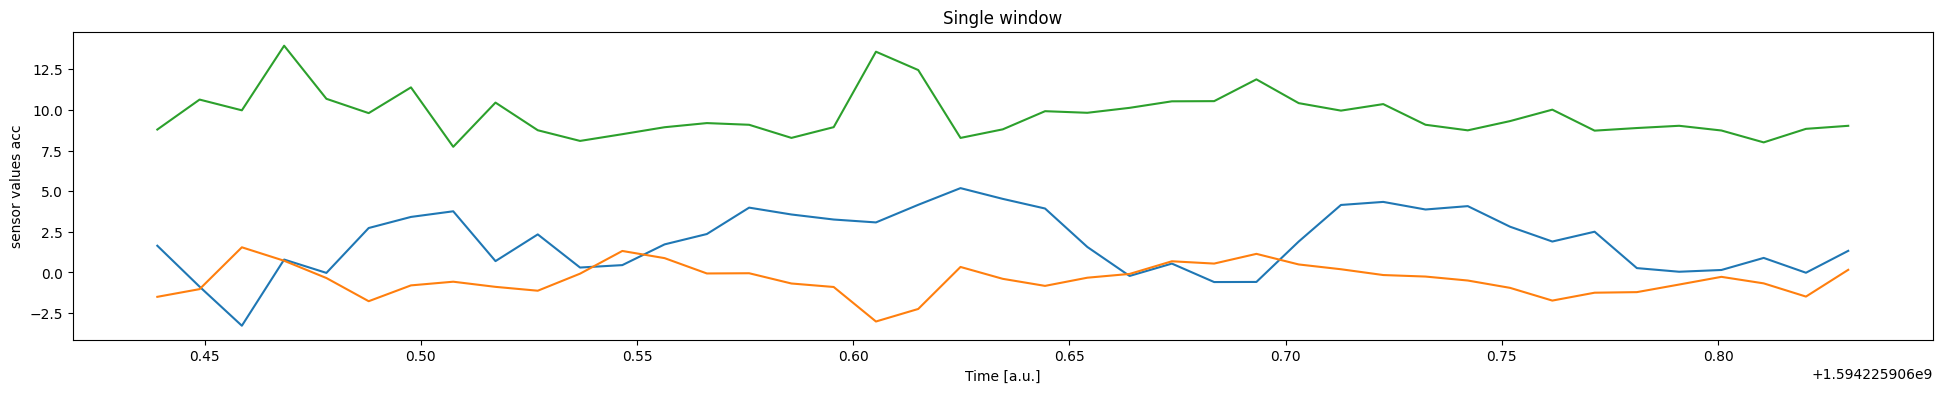

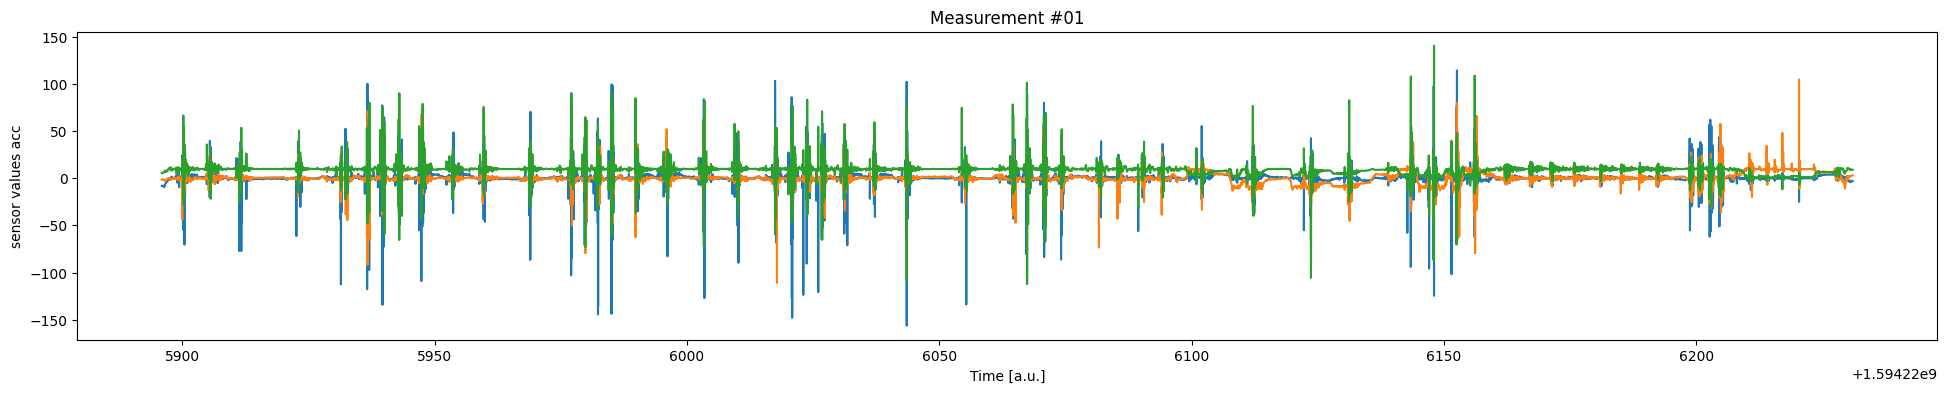

In [ ]:
import matplotlib.pyplot as plt

# plot a sample
plt.figure(figsize=(24,4))
plt.title(f"Single window")
t = Xt_acc[70][:, 0]
x_win = Xt_acc[70][:, 1:]
plt.plot(t, x_win)
plt.xlabel('Time [a.u.]')
plt.ylabel('sensor values acc')
plt.show()

# plot a measurement
plotme = data_dict["01"].acc.ts
t = plotme[:, 0]
x_mea = plotme[:, 1:]
plt.figure(figsize=(24,4))
plt.title("Measurement #01")
plt.plot(t, x_mea)
plt.xlabel('Time [a.u.]')
plt.ylabel('sensor values acc')
plt.show()

## 3. Preprocess the Data

In [ ]:
from fhgutils import filter_labels, one_label_per_window, summarize_labels

### 3.1 `filter_labels`
- filter out labels [-1]
- also filter out whole windows, in case there is no majority label 
- e.g. window length of 5, labels could be [1,1,1,1,0] -> okay. but if [1,1,0,0,2] -> discard window.

In [ ]:
values, counts = np.unique(y_acc, return_counts=True)
for val, count in zip(values, counts):
    print(f"[INFO] label {val} with {count} samples")

[INFO] label -1.0 with 444 samples
[INFO] label 2.0 with 8861 samples
[INFO] label 3.0 with 8524 samples
[INFO] label 4.0 with 1838 samples
[INFO] label 5.0 with 1348 samples
[INFO] label 7.0 with 2767 samples
[INFO] label 8.0 with 143319 samples
[INFO] label 14.0 with 1813 samples
[INFO] label 38.0 with 1072 samples


In [ ]:
Xt_acc_f, Xc_acc_f, y_acc_f = filter_labels(labels=[-1], Xt=Xt_acc, Xc=Xc_acc, y=y_acc)

[INFO] original Xt: 4146 (41, 4)
[INFO] filtered Xt: 4136 (41, 4)


### 3.2 `one_label_per_window`
- flatten labels of windows to the majority label
- `[1,1,1,1,2]` -> 1. bad if you've got `[0,0,0,0,0,1,1,1,1,1,1]` -> 1, this creates anomalous samples of class 1

In [ ]:
print("pre", y_acc_f[5])
y_acc_f = one_label_per_window(y=y_acc_f)
print("post", y_acc_f[5])

pre [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
flattened 8 labels: [ 2  3  4  5  7  8 14 38]
post 8


### 3.3 `summarize_labels`
- some labels are basically very similar, like "pull_trigger, pull_trigger_air" for the Pneumatic Rivet Gun
- same action, but once holding the tool in the air, once using it on a workpiece.

In [ ]:
summarylabels = {5: [0, 1]} 
y_acc_f_sum = summarize_labels(y_acc, summarylabels)

[INFO] Summarized labels from [-1.  2.  3.  4.  5.  7.  8. 14. 38.] to [-1.  2.  3.  4.  5.  7.  8. 14. 38.]
